In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv('noon_mobiles.csv')
df.head(10)

,MobileOrAccessories,Review,Price
0,Xiaomi Redmi\n12 Dual SIM M…,4.4,"6,899"
1,realme 12x\nFeather Gree…,4.4,"8,780"
2,Samsung\nGalaxy A55 D…,4.5,"19,999"
3,Samsung\nGalaxy A15 D…,4.4,"7,326"
4,Xiaomi Redmi\nA3 Dual SIM …,4.3,"4,299"
5,realme Note 50\nDual SIM Mid…,4.2,"4,900"
6,ITEL A70 Dual\nSIM Starlish B…,4.3,"3,877"
7,"OPPO Oppo\nA60, 256GB, …",4.3,"8,545"
8,realme 12x\nGlowing Blac…,4.1,"8,850"
9,NOKIA C10\nDual Sim 2GB…,3.8,"2,580"


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MobileOrAccessories  578 non-null    object 
 1   Review               578 non-null    float64
 2   Price                578 non-null    object 
dtypes: float64(1), object(2)
memory usage: 13.7+ KB


In [71]:
df['MobileOrAccessories'] = df['MobileOrAccessories'].str.split('\n').str[0]
df['MobileOrAccessories'] = df['MobileOrAccessories'].replace('Generic', 'Generic Case')
df.head()

,MobileOrAccessories,Review,Price
0,Xiaomi Redmi,4.4,6899.0
1,realme 12x,4.4,8780.0
2,Samsung,4.5,19999.0
3,Samsung,4.4,7326.0
4,Xiaomi Redmi,4.3,4299.0


In [67]:
df['Price']=df['Price'].str.replace('₹','')
df['Price']=df['Price'].str.replace(',','')
df['Price']=df['Price'].astype(float)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MobileOrAccessories  578 non-null    object 
 1   Review               578 non-null    float64
 2   Price                578 non-null    float64
dtypes: float64(2), object(1)
memory usage: 13.7+ KB


In [69]:
df.describe()

,Review,Price
count,578.000000,578.000000
mean,4.292042,5126.364879
std,0.656501,11907.927948
min,1.000000,29.000000
25%,4.000000,110.000000
50%,4.400000,300.000000
75%,5.000000,4831.750000
max,5.000000,74999.000000


In [70]:
df.isnull().sum()

,0
MobileOrAccessories,0
Review,0
Price,0


# **Visualization**

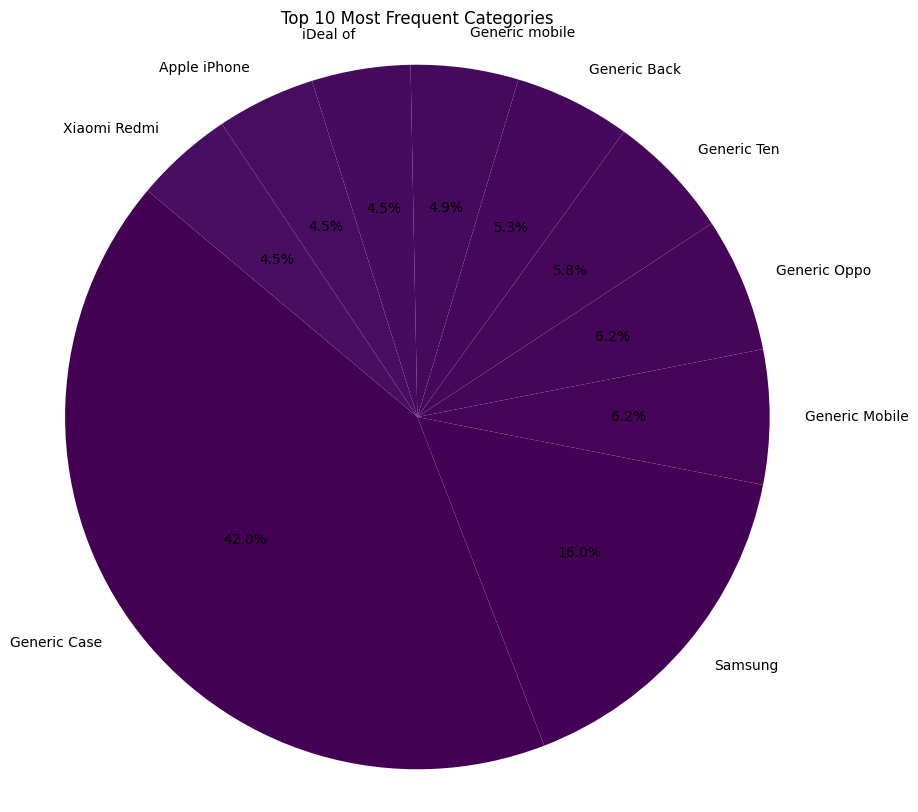

In [72]:
# Find the top 10 most frequent categories
top_10_categories = df['MobileOrAccessories'].value_counts().head(10)

df_top_10 = df[df['MobileOrAccessories'].isin(top_10_categories.index)]
plt.figure(figsize=(10, 10))
plt.pie(top_10_categories.values, labels=top_10_categories.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis(range(10)))
plt.title('Top 10 Most Frequent Categories')
plt.axis('equal')

plt.show()


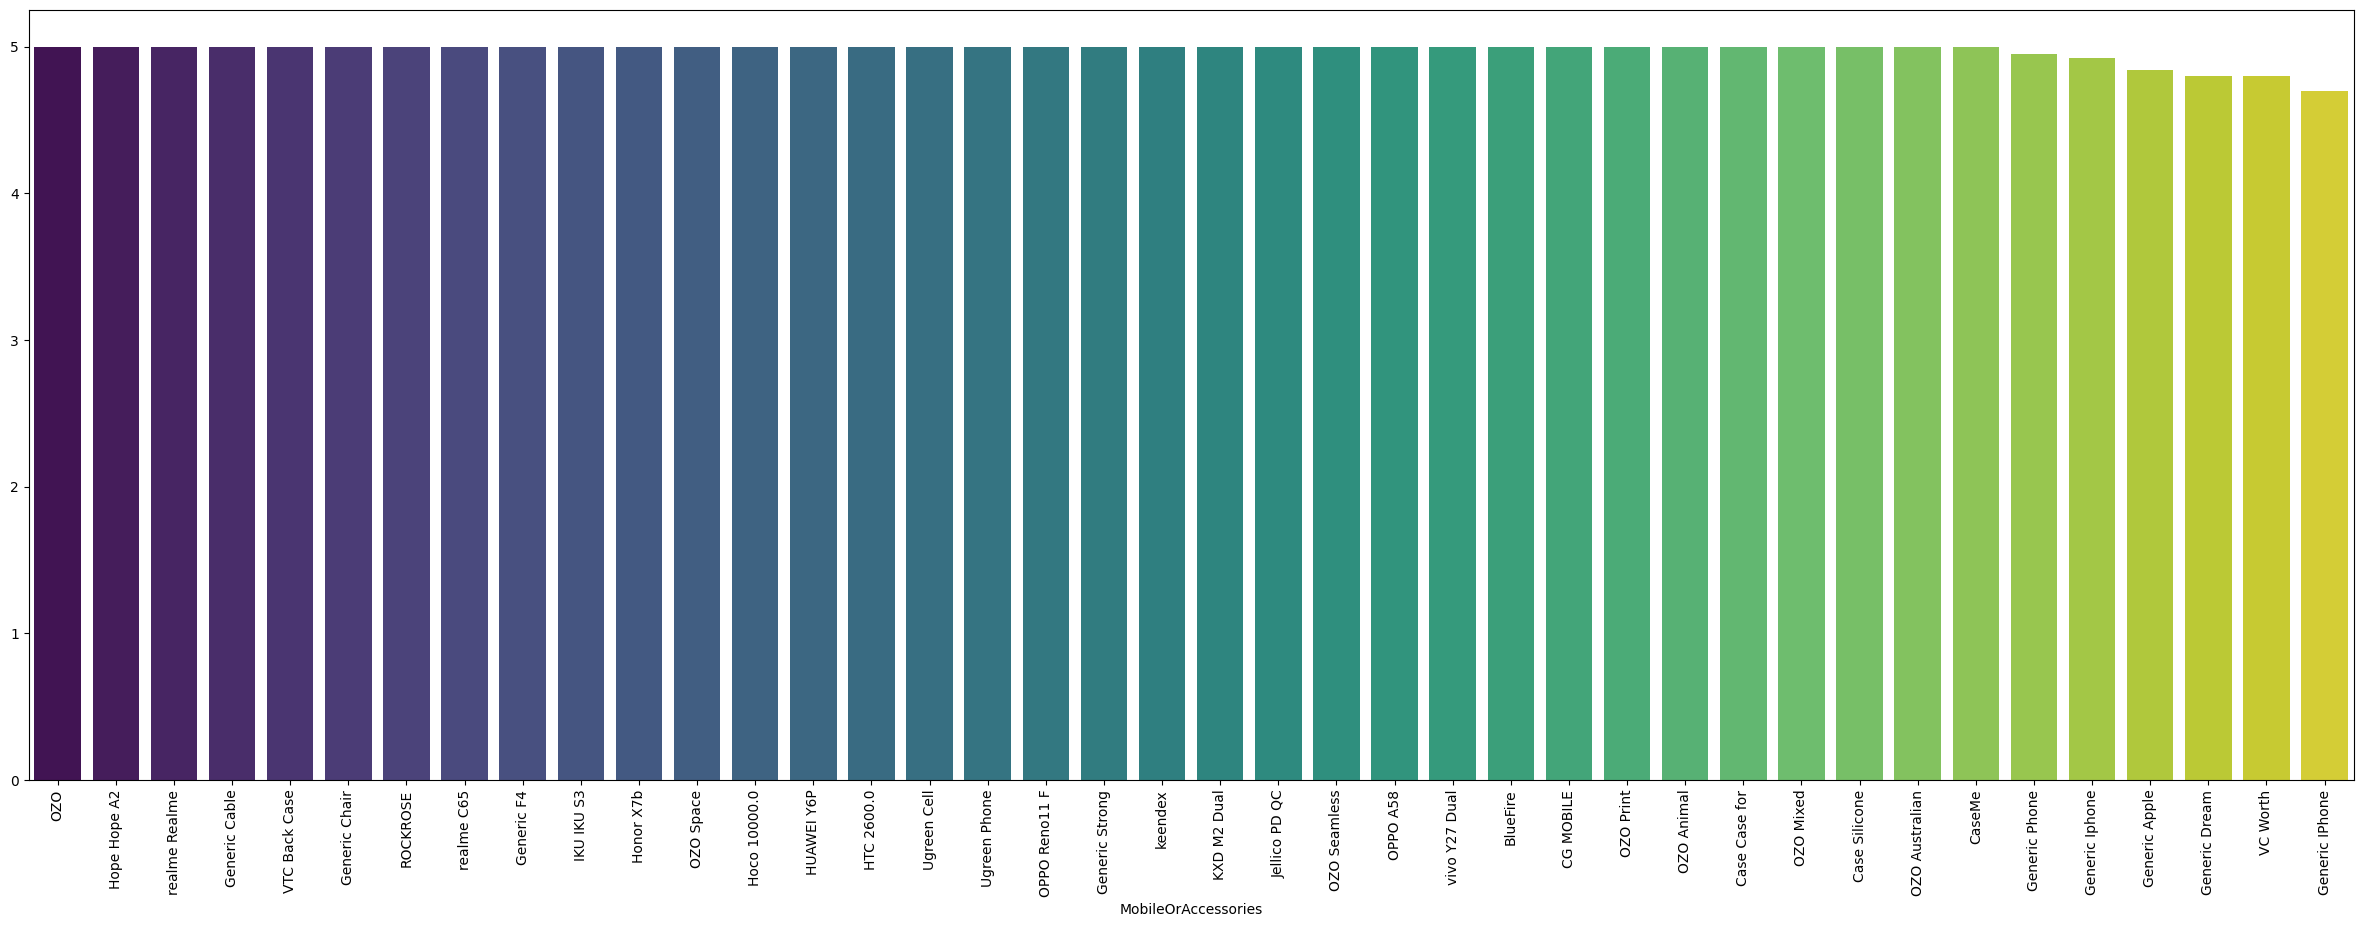

In [85]:
#What is the highest Review for mobile or accessories?
reviews = df.groupby('MobileOrAccessories')['Review'].mean().sort_values(ascending=False).head(40)
plt.figure(figsize=(30,10))
sns.barplot(x=reviews.index, y=reviews.values, palette='viridis')
plt.xticks(rotation=90)
plt.show()

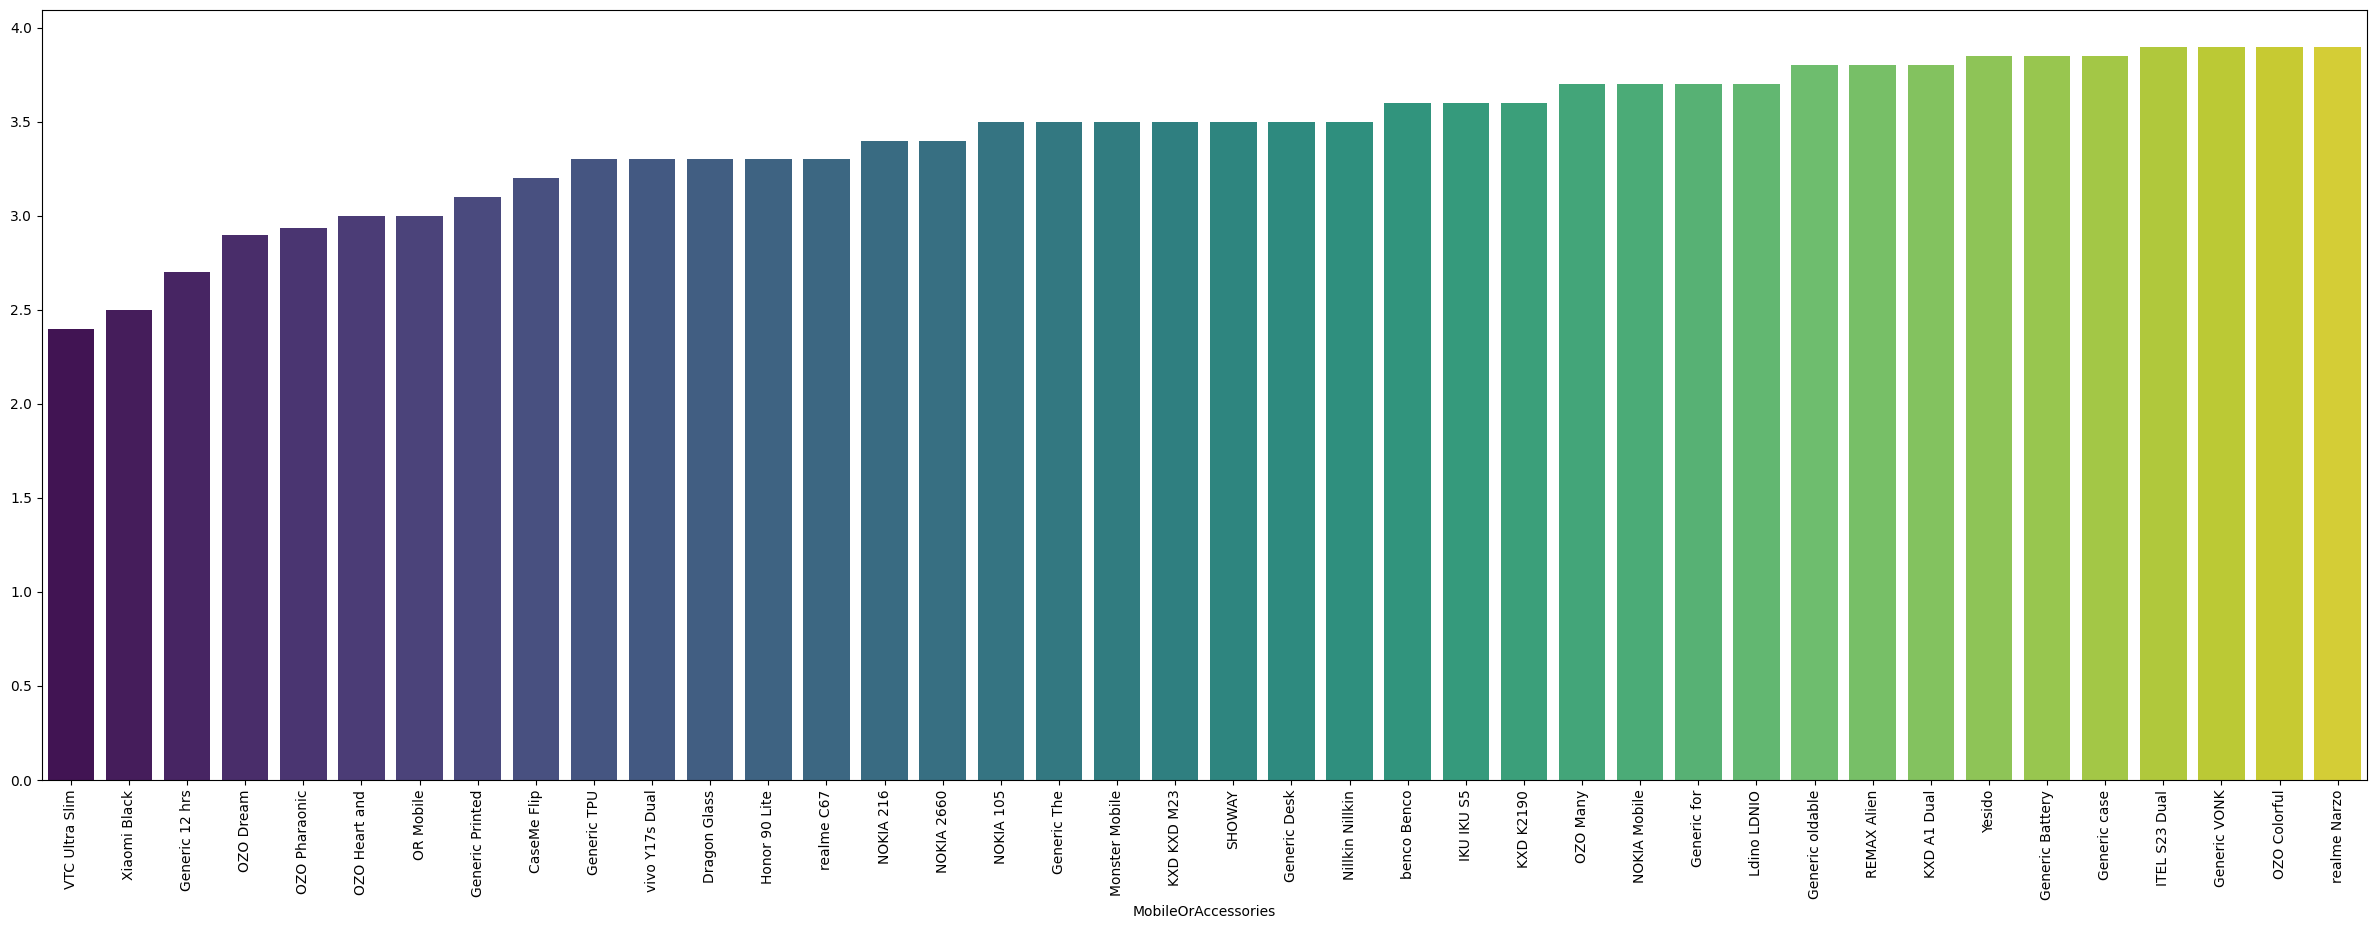

In [86]:
#What is the lowest Review for mobile or accessories?
review=df.groupby('MobileOrAccessories')['Review'].mean().sort_values(ascending=True).head(40)
plt.figure(figsize=(30,10))
sns.barplot(x=review.index, y=review.values, palette='viridis')
plt.xticks(rotation=90)
plt.show()


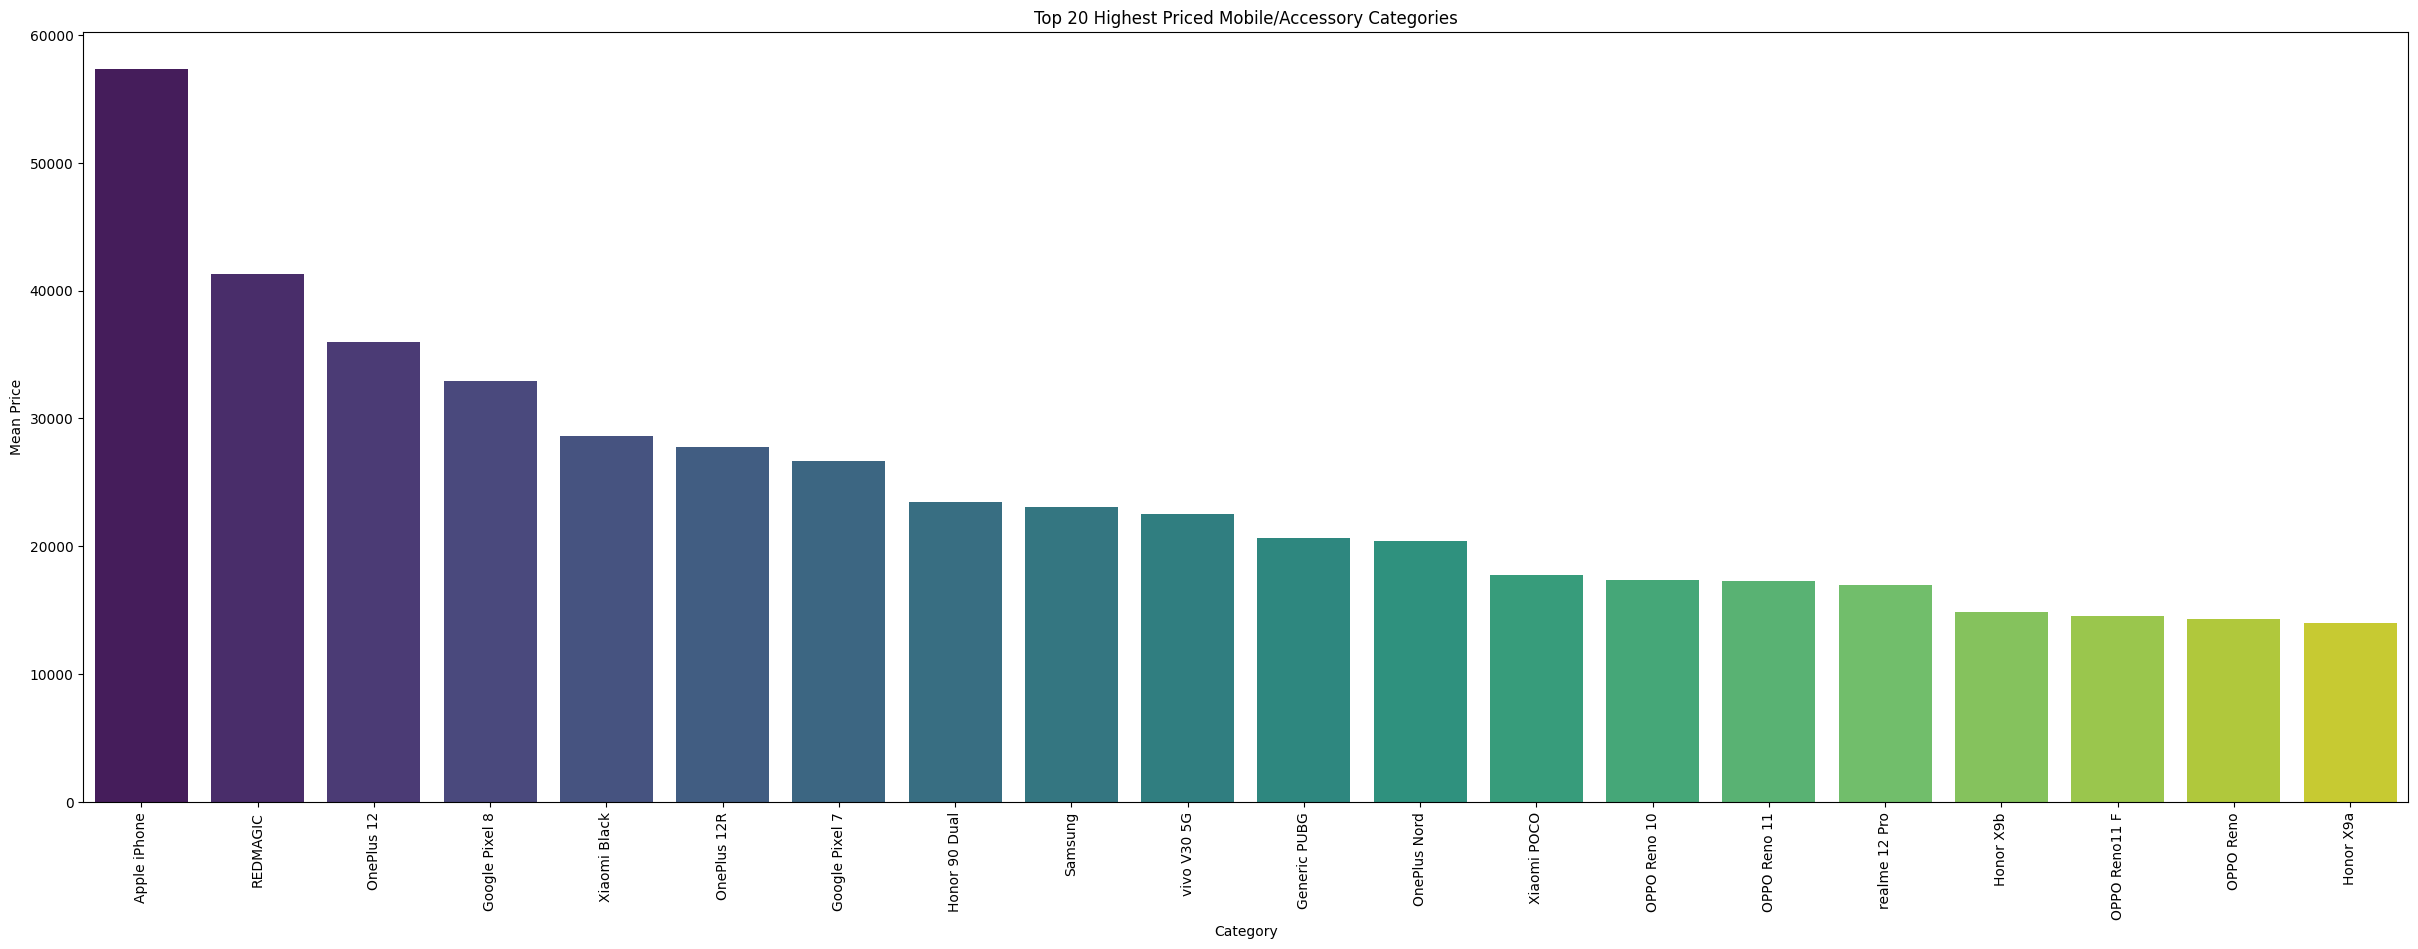

In [87]:
# What is the Highest Price for Mobile/Accessory Categories?
c = df.groupby('MobileOrAccessories')['Price'].mean().sort_values(ascending=False)
top_20_categories = category_prices.head(20)
plt.figure(figsize=(30, 10))
sns.barplot(x=top_20_categories.index, y=top_20_categories.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 20 Highest Priced Mobile/Accessory Categories')
plt.xlabel('Category')
plt.ylabel('Mean Price')
plt.show()

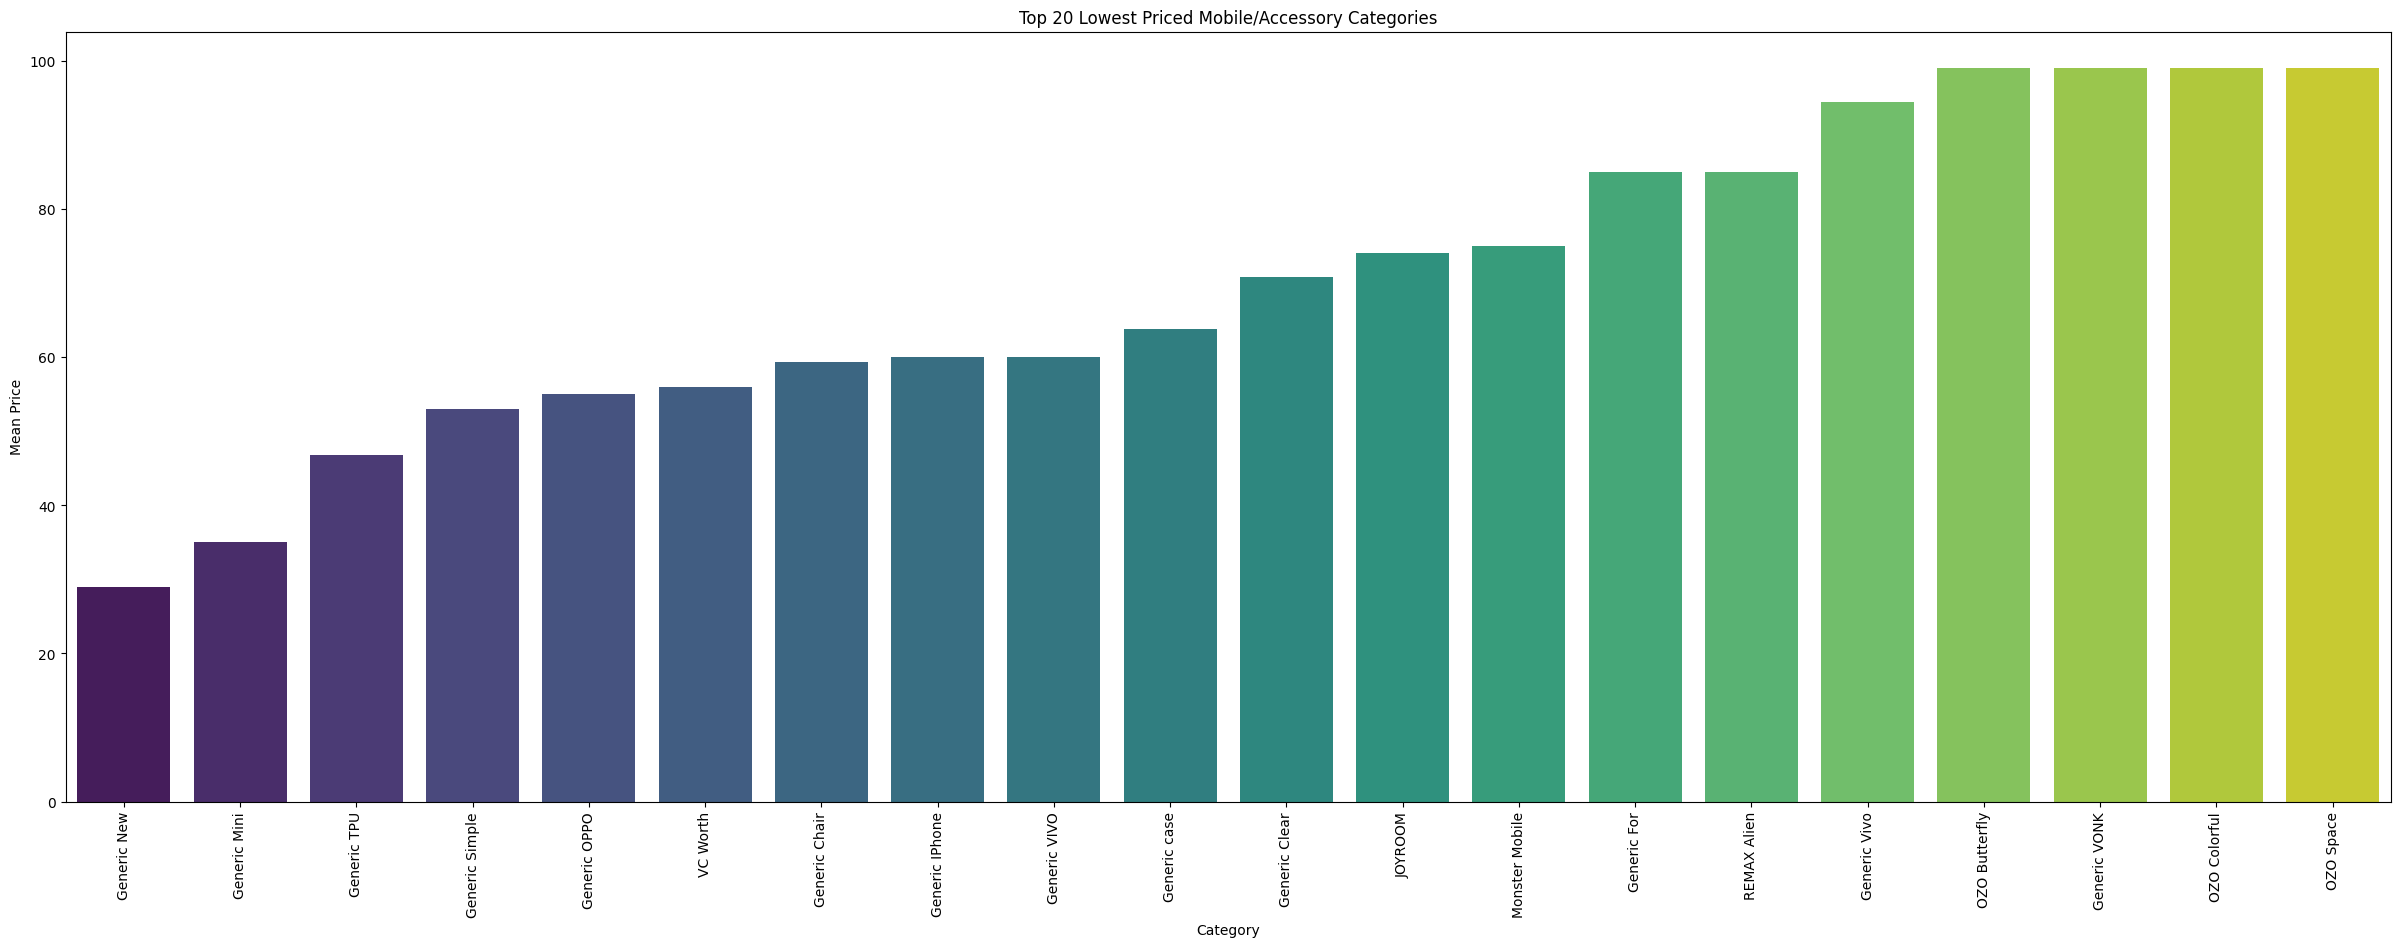

In [88]:
# What is the lowest Price for Mobile/Accessory Categories?
category_price = df.groupby('MobileOrAccessories')['Price'].mean().sort_values(ascending=True).head(20)
top_20_categories = category_price.head(20)
plt.figure(figsize=(30, 10))
sns.barplot(x=top_20_categories.index, y=top_20_categories.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 20 Lowest Priced Mobile/Accessory Categories')
plt.xlabel('Category')
plt.ylabel('Mean Price')
plt.show()